<a href="https://colab.research.google.com/github/JaledMC/Learning-Artificial-Vision/blob/master/arithmetic_operations_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arithmetic Operations on Images



This notebook extracts regions of interest of the images (ROI), and adds rhwm to other images. If you don't have the needed libraries, run the next block.

In [0]:
!apt-get -qq install -y libsm6 libxext6 && pip3 install -q -U opencv-python
!pip3 install -q matplotlib
!pip3 install -q numpy
!pip3 install -q requests

Import libraries

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Download images

To use the github images, first download the image sto local folder.

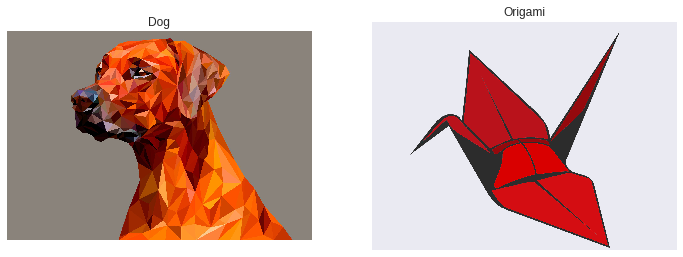

In [2]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://raw.githubusercontent.com/JaledMC/Learning-Artificial-Vision/master/images/dog.jpg')
img = Image.open(BytesIO(response.content))
img.save("dog.jpg")
response = requests.get('https://raw.githubusercontent.com/JaledMC/Learning-Artificial-Vision/master/images/origami.png')
img2 = Image.open(BytesIO(response.content))
img2.save("origami.png")


# Represent the image
fig, axes = plt.subplots(1, 2, figsize=(12, 12))
axes[0].imshow(img)
axes[0].set_title('Dog')
axes[1].imshow(img2)
axes[1].set_title('Origami')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

In [0]:
image = cv2.imread('dog.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image2 = cv2.imread('origami.png')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

We can replace pixels values in any regular region with an easy step. Select the coordinates of the ROI and the final position. Both areas must have the same size.

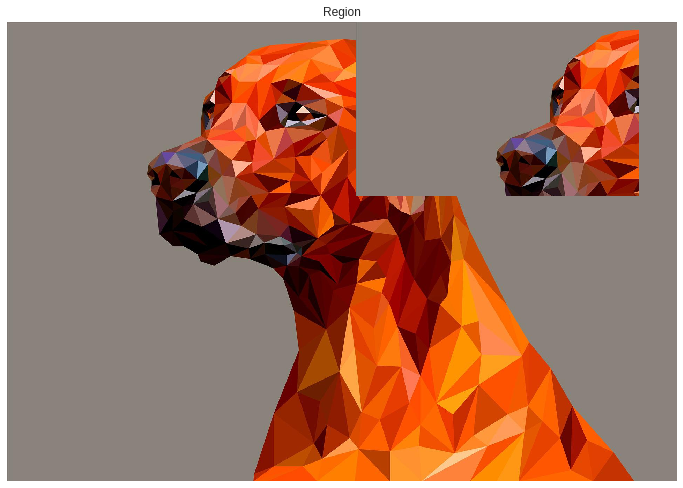

In [4]:
# Select and change pixel regions
image3 = image.copy()
image3[0:500, 1000:1810] = image3[40:540, 0:810]  # Change one region for another with same size

fig, axes = plt.subplots(1, 1, figsize=(12, 12))
axes.imshow(image3)
axes.set_title('Region')
plt.xticks([]), plt.yticks([]);  # to hide tick values on X and Y axis

## Adding two images. Basic method

We can mix two images with differents methods in OpenCV. With "add" function, the output doesn't look as expected, because intensity of pixels is added, literally, passing the '255' limit, with a saturation efect. With "addWeight" we can smooth this efect, the weight of each image can be adjusted.

Both images must have same size. Use resize function for this.

In [5]:
# mixing to images. They must have same dimensions
row, col, channels = image.shape
image2_resized = cv2.resize(image2, (col, row))

print("Dog image: ", row, col, channels)
row, col, channels = image2.shape
print("Origami image: ",row, col, channels)
print("Both images have same dimensions")

Dog image:  1316 1920 3
Origami image:  1439 1920 3
Both images have same dimensions


In [0]:
# Add two images
image_added = cv2.add(image, image2_resized)
# Mix to images image1, weight1, image2, weight2, alpha
image_mixed = cv2.addWeighted(image, 0.2, image2_resized, 0.8, 0)

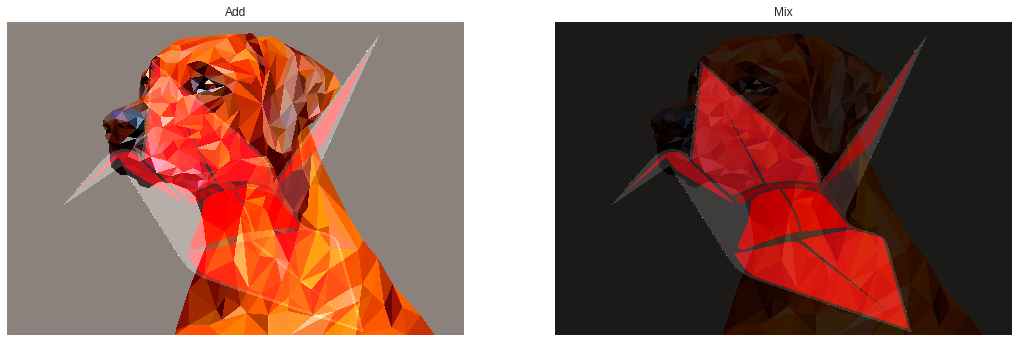

In [7]:
# Represent the images
fig, axes = plt.subplots(1, 2, figsize=(18, 16))
axes[0].imshow(image_added)
axes[0].set_title('Add')
axes[1].imshow(image_mixed)
axes[1].set_title('Mix')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

## Adding to images with no regular shape

To add to images, que have to remove the background and the ROI of each other, to apply add() without change any other pixel. To do that, we have to detec the border with a filter, obtainn the mask and add the replace the pixel of one pixel into another. First copy the original image.

In [0]:
image_fusion = image.copy()

Reduce the image that is going to be added (we want it smaller than base image). Obtain too the area where all this oporation is done, the ROI.

In [0]:
# Select first the roi of base image with same area that added image
image_resized = cv2.resize(image2, (1000, 1000))
row, col, channels = image_resized.shape
roi = image_fusion[0:row, 0:col]

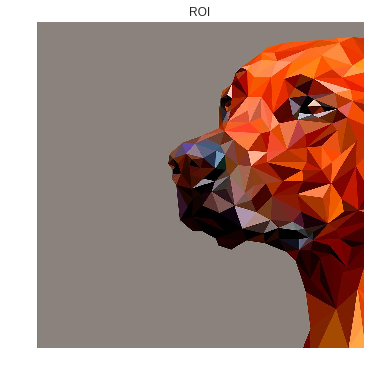

In [10]:
# Represent the image
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
axes.imshow(roi)
axes.set_title('ROI')
plt.axis("off");

Convert image2 to gray and apply threshold to obtain a binary mask (and his inverse)

In [0]:
image2gray2 = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(image2gray2, 0, 255,  cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# mask = 255 - mask 
mask_inv = cv2.bitwise_not(mask)

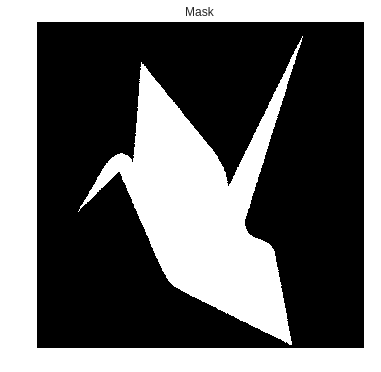

In [12]:
# Represent the image
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
axes.imshow(mask)
axes.set_title('Mask')
plt.axis("off");

Subsctrat pixels of the roi where the image2 will be added, and substract the background of the image2


In [0]:
substracted = cv2.bitwise_and(roi,roi,mask = mask)
stick = cv2.bitwise_and(image_resized,image_resized,mask = mask_inv)

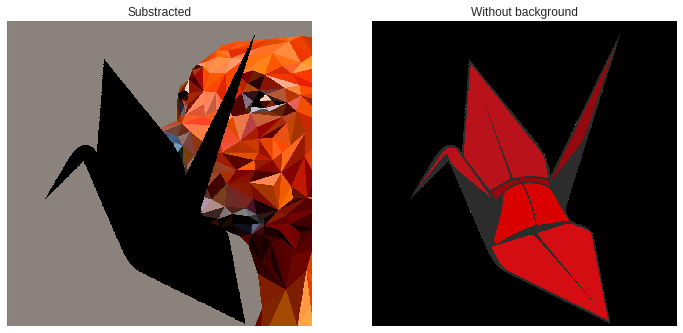

In [14]:
# Represent both images
fig, axes = plt.subplots(1, 2, figsize=(12, 12))
axes[0].imshow(substracted, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Substracted')
axes[1].imshow(stick, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Without background')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

Add the substracted and the image without background, and add this modified ROI to the original image


In [0]:
mix = cv2.add(substracted, stick)
image[0:row, 0:col] = mix

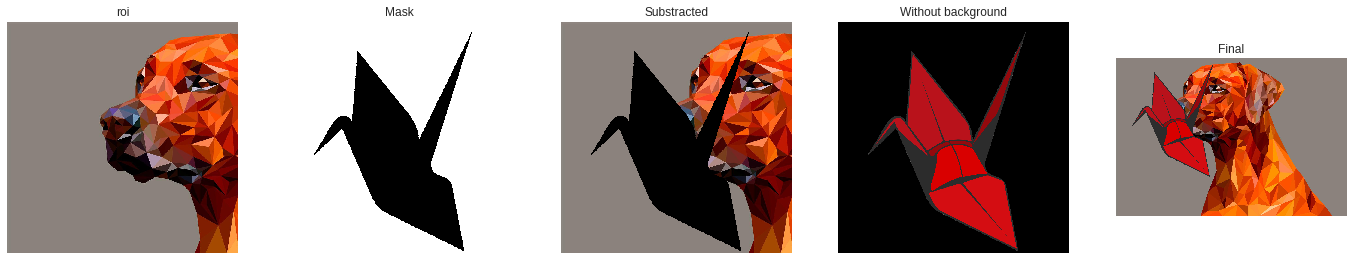

In [18]:
fig, axes = plt.subplots(1, 5, figsize=(24, 18))
axes[0].imshow(roi, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('roi')
axes[1].imshow(mask, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Mask')
axes[2].imshow(substracted, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('Substracted')
axes[3].imshow(stick, cmap='gray', vmin=0, vmax=255)
axes[3].set_title('Without background')
axes[4].imshow(image, cmap='gray', vmin=0, vmax=255)
axes[4].set_title('Final')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])